<a href="https://colab.research.google.com/github/01-vyom/Machine-Learning-Projects/blob/master/Kaggle/Digit%20Recognizer/Digit_Recog_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
#This is the code used for Tensorflow 2.x in Google Colab!!
# first step is to import the libraries that are currently required
import pandas as pd
import matplotlib.pyplot as plt
# x_data = range(0,l_data.shape[0]
import seaborn as sns
#LotFrontage
#LotArea
#YearBuilt
#TotalBsmtsf
#GarageArea
#PoolArea
import time
import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from sklearn.utils import shuffle
from tensorflow.python.data import Dataset
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
pd.options.display.max_rows = 25
pd.options.display.float_format = '{:.5f}'.format

In [0]:
Digit_Recog_Data = pd.read_csv("/content/drive/My Drive/Digit Recog/train.csv")
Digit_Recog_Data = shuffle(Digit_Recog_Data)

In [0]:
Digit_Target = Digit_Recog_Data[['label']]
Digit_Feature = Digit_Recog_Data.drop(columns=['label'])

In [0]:
Digit_Feature = Digit_Feature.values
Digit_Target = Digit_Target.values
Digit_Feature = Digit_Feature.reshape(-1,28,28,1)
Digit_Feature = Digit_Feature/255.0

In [0]:
#.980 with validation
#.97854 without validation
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
#.980 with validation
#.97854 without validation
# with validation and a very different type of network
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, kernel_size=(5,5),padding = 'Same', activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(32, kernel_size=(5,5),padding = 'Same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, kernel_size=(3,3),padding = 'Same', activation='relu'),
  tf.keras.layers.Conv2D(64, kernel_size=(3,3),padding = 'Same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
history = model.fit(
    x=Digit_Feature,
    y=Digit_Target,
    batch_size = 86,
    validation_split = 0.1,
    epochs = 30,
    callbacks=[learning_rate_reduction]
)

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 8s 221us/sample - loss: 0.2472 - accuracy: 0.9235 - val_loss: 0.0530 - val_accuracy: 0.9831
Epoch 2/30
37800/37800 [==============================] - 7s 190us/sample - loss: 0.0732 - accuracy: 0.9778 - val_loss: 0.0403 - val_accuracy: 0.9888
Epoch 3/30
37800/37800 [==============================] - 7s 190us/sample - loss: 0.0552 - accuracy: 0.9840 - val_loss: 0.0326 - val_accuracy: 0.9883
Epoch 4/30
37800/37800 [==============================] - 7s 189us/sample - loss: 0.0468 - accuracy: 0.9860 - val_loss: 0.0335 - val_accuracy: 0.9910
Epoch 5/30
37800/37800 [==============================] - 7s 191us/sample - loss: 0.0398 - accuracy: 0.9885 - val_loss: 0.0295 - val_accuracy: 0.9912
Epoch 6/30
37800/37800 [==============================] - 7s 190us/sample - loss: 0.0364 - accuracy: 0.9896 - val_loss: 0.0305 - val_accuracy: 0.9902
Epoch 7/30
37800/37800 [===========================

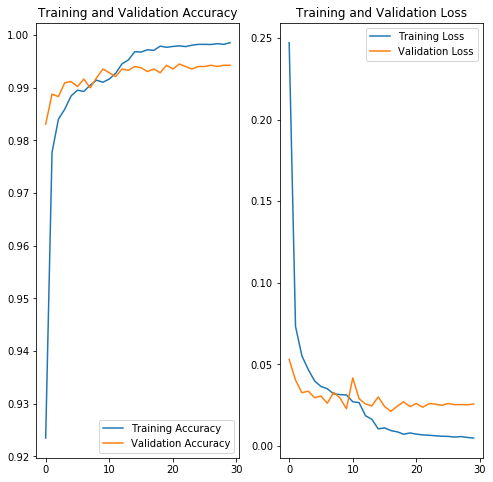

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
EPOCHS = 30
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
Digit_Recog_TestData = pd.read_csv("/content/drive/My Drive/Digit Recog/test.csv")
Digit_Predict = Digit_Recog_TestData.values.reshape(-1,28,28,1)
Digit_Predict = Digit_Predict / 255.0

In [0]:
predictions = model.predict(Digit_Predict)
preds = np.argmax(predictions, axis=-1)

In [0]:
print(type(preds))
k = 1
main = []
for i in range(len(preds)):
  l=[k+i,preds[i]]
  main.append(l)
dfans = pd.DataFrame(main)


<class 'numpy.ndarray'>


In [0]:
dfans.to_csv('/content/drive/My Drive/Digit Recog/Digit_Recog_6.csv', index=False)

In [0]:
#h5 save modal

t = time.time()

export_path_keras = "/content/drive/My Drive/Digit Recog/{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)


/content/drive/My Drive/Digit Recog/1573903162.h5


In [0]:
t = time.time()

export_path_sm = "/content/drive/My Drive/Digit Recog/{}".format(int(t))
print(export_path_sm)

tf.saved_model.save(model, export_path_sm)

/content/drive/My Drive/Digit Recog/1573903330
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: /content/drive/My Drive/Digit Recog/1573903330/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Digit Recog/1573903330/assets
